# Exp 05 : UCB and Optimal Initial Value

### Aim : Experimenting with Upper Confidence Bound and Optimistic Initialization strategy and analyzing its impact on the learning performance of an agent.

In [ ]:
pip install numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultiArmedBandit:
    def __init__(self, k=10):
        self.k = k  # Number of arms
        self.q_true = np.random.normal(0, 1, k)  # True reward values for each arm
        self.best_arm = np.argmax(self.q_true)  # Best arm index

    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)  # Sample reward from Gaussian distribution

In [ ]:
class UCB_Agent:
    def __init__(self, k, c=2):
        self.k = k  # Number of actions (arms)
        self.c = c  # Confidence parameter
        self.counts = np.zeros(k)  # Number of times each action is selected
        self.q_estimates = np.zeros(k)  # Estimated values of each action
        self.total_steps = 0  # Total time steps

    def select_action(self):
        self.total_steps += 1
        if 0 in self.counts:  # Ensures every action is selected at least once
            return np.argmin(self.counts)
        ucb_values = self.q_estimates + self.c * np.sqrt(np.log(self.total_steps) / self.counts)
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.counts[action]

In [ ]:
class Optimistic_Initial_Agent:
    def __init__(self, k, q_init=5):
        self.k = k
        self.q_estimates = np.ones(k) * q_init  # Optimistic initial values
        self.counts = np.zeros(k)

    def select_action(self):
        return np.argmax(self.q_estimates)  # Select action with highest estimated value

    def update(self, action, reward):
        self.counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.counts[action]


In [ ]:
def run_experiment(agent, bandit, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for t in range(steps):
        action = agent.select_action()
        reward = bandit.get_reward(action)
        agent.update(action, reward)

        rewards[t] = reward
        if action == bandit.best_arm:
            optimal_action_counts[t] = 1  # Track how often the best action was chosen

    return rewards, np.cumsum(optimal_action_counts) / np.arange(1, steps + 1)

# Create bandit environment
bandit = MultiArmedBandit(k=10)

# Create agents
ucb_agent = UCB_Agent(k=10)
optimistic_agent = Optimistic_Initial_Agent(k=10, q_init=5)

# Run experiments
ucb_rewards, ucb_optimal = run_experiment(ucb_agent, bandit)
optimistic_rewards, optimistic_optimal = run_experiment(optimistic_agent, bandit)


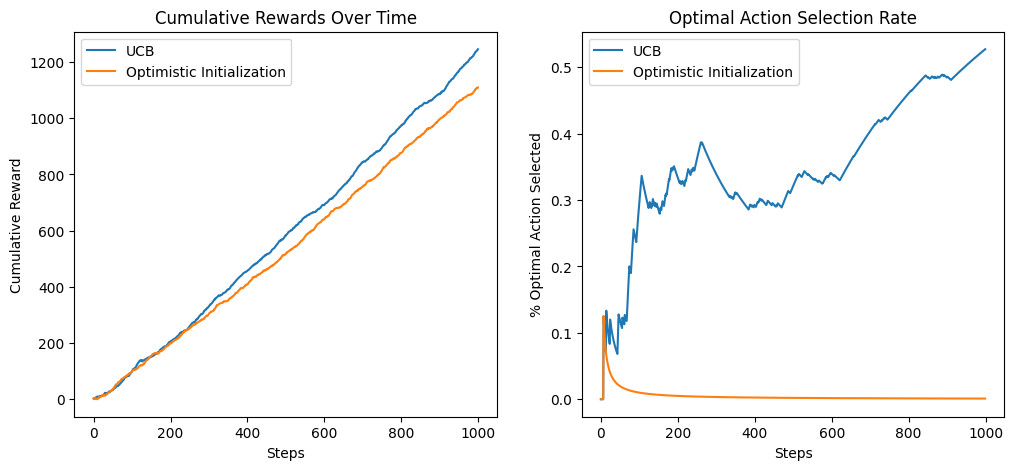

In [ ]:
plt.figure(figsize=(12, 5))

# Plot cumulative rewards
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(ucb_rewards), label="UCB")
plt.plot(np.cumsum(optimistic_rewards), label="Optimistic Initialization")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards Over Time")
plt.legend()

# Plot optimal action selection rate
plt.subplot(1, 2, 2)
plt.plot(ucb_optimal, label="UCB")
plt.plot(optimistic_optimal, label="Optimistic Initialization")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action Selected")
plt.title("Optimal Action Selection Rate")
plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Number of actions (arms)
n_arms = 10
n_steps = 1000
n_simulations = 100

# True reward distribution for each arm (Gaussian)
true_means = np.random.normal(0, 1, n_arms)

In [ ]:
def ucb_action_selection(q_values, counts, step, c=2):
    """Select action using Upper Confidence Bound (UCB) strategy."""
    ucb_values = q_values + c * np.sqrt(np.log(step + 1) / (counts + 1e-5))
    return np.argmax(ucb_values)

In [ ]:
def optimistic_initialization(n_arms, init_value=5):
    """Initialize action-value estimates optimistically."""
    return np.ones(n_arms) * init_value

In [ ]:
def run_ucb_experiment():
    rewards = np.zeros((n_simulations, n_steps))
    for sim in range(n_simulations):
        q_values = np.zeros(n_arms)
        counts = np.zeros(n_arms)
        for t in range(n_steps):
            action = ucb_action_selection(q_values, counts, t)
            reward = np.random.normal(true_means[action], 1)
            counts[action] += 1
            q_values[action] += (reward - q_values[action]) / counts[action]
            rewards[sim, t] = reward
    return np.mean(rewards, axis=0)

In [ ]:
def run_optimistic_experiment():
    rewards = np.zeros((n_simulations, n_steps))
    for sim in range(n_simulations):
        q_values = optimistic_initialization(n_arms)
        counts = np.zeros(n_arms)
        for t in range(n_steps):
            action = np.argmax(q_values)
            reward = np.random.normal(true_means[action], 1)
            counts[action] += 1
            q_values[action] += (reward - q_values[action]) / counts[action]
            rewards[sim, t] = reward
    return np.mean(rewards, axis=0)

In [ ]:
# Run experiments
ucb_rewards = run_ucb_experiment()
optimistic_rewards = run_optimistic_experiment()

In [ ]:
# Plot results creatively
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

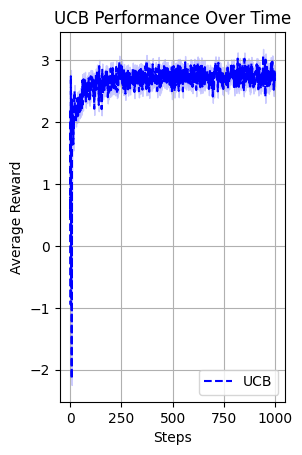

In [ ]:
# UCB Performance
plt.subplot(1, 2, 1)
plt.plot(ucb_rewards, label='UCB', color='blue', linestyle='dashed')
plt.fill_between(range(n_steps), ucb_rewards - 0.1, ucb_rewards + 0.1, color='blue', alpha=0.2)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('UCB Performance Over Time')
plt.legend()
plt.grid(True)

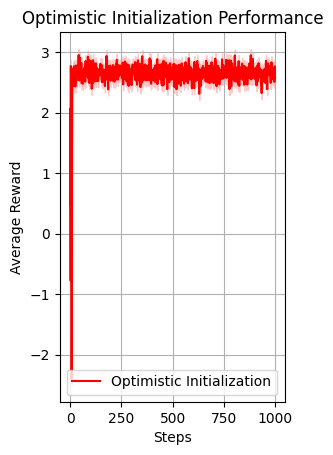

In [ ]:
# Optimistic Initialization Performance
plt.subplot(1, 2, 2)
plt.plot(optimistic_rewards, label='Optimistic Initialization', color='red', linestyle='solid')
plt.fill_between(range(n_steps), optimistic_rewards - 0.1, optimistic_rewards + 0.1, color='red', alpha=0.2)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Optimistic Initialization Performance')
plt.legend()
plt.grid(True)

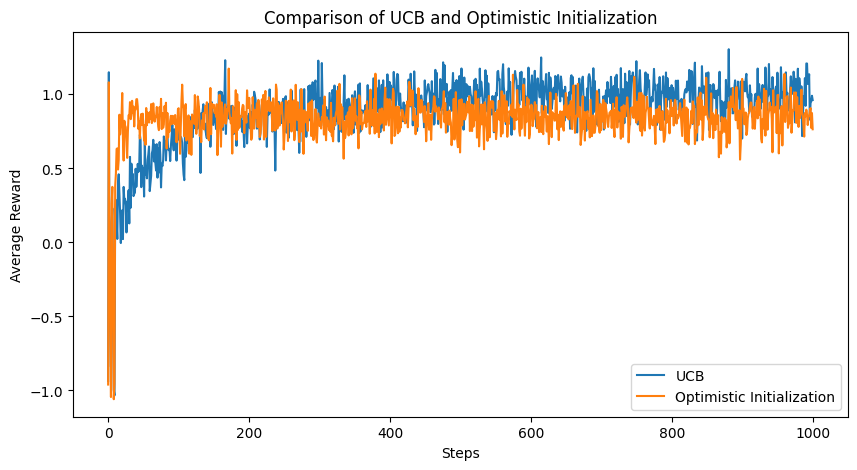

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions (arms)
n_arms = 10
n_steps = 1000
n_simulations = 100

# True reward distribution for each arm (Gaussian)
true_means = np.random.normal(0, 1, n_arms)

def ucb_action_selection(q_values, counts, step, c=2):
    """Select action using Upper Confidence Bound (UCB) strategy."""
    ucb_values = q_values + c * np.sqrt(np.log(step + 1) / (counts + 1e-5))
    return np.argmax(ucb_values)

def optimistic_initialization(n_arms, init_value=5):
    """Initialize action-value estimates optimistically."""
    return np.ones(n_arms) * init_value

def run_experiment(strategy='ucb'):
    rewards = np.zeros((n_simulations, n_steps))
    for sim in range(n_simulations):
        q_values = np.zeros(n_arms) if strategy == 'ucb' else optimistic_initialization(n_arms)
        counts = np.zeros(n_arms)
        for t in range(n_steps):
            if strategy == 'ucb':
                action = ucb_action_selection(q_values, counts, t)
            else:  # Optimistic Initialization (greedy action selection)
                action = np.argmax(q_values)

            reward = np.random.normal(true_means[action], 1)
            counts[action] += 1
            q_values[action] += (reward - q_values[action]) / counts[action]
            rewards[sim, t] = reward
    return np.mean(rewards, axis=0)

# Run experiments
ucb_rewards = run_experiment('ucb')
optimistic_rewards = run_experiment('optimistic')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(ucb_rewards, label='UCB')
plt.plot(optimistic_rewards, label='Optimistic Initialization')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of UCB and Optimistic Initialization')
plt.legend()
plt.show()
